In [1]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

worksheet = gc.open('dp').sheet1

In [43]:
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Input':'float'})
df = df.astype({'Output':'float'})
df.head()

,Input,Output
0,1.0,7.0
1,2.0,14.0
2,3.0,21.0
3,4.0,28.0
4,5.0,35.0


In [44]:
X=df[['Input']].values
y=df[['Output']].values

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=33)

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
Scaler=MinMaxScaler()

In [49]:
Scaler.fit(X_train)

MinMaxScaler()

In [50]:
X_train1=Scaler.transform(X_train)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
ai_brain=Sequential([
    Dense(9,activation='relu'),
    Dense(11,activation='relu'),

    Dense(1)
])

In [52]:
ai_brain.compile(
    optimizer = 'rmsprop',
    loss = 'mse'
)

ai_brain.fit(X_train1,y_train,epochs = 3000)

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 6ms/step - loss: 65383.0000
Epoch 502/3000
3/3 [==============================] - 0s 5ms/step - loss: 65071.6719
Epoch 503/3000
3/3 [==============================] - 0s 5ms/step - loss: 64695.8750
Epoch 504/3000
3/3 [==============================] - 0s 6ms/step - loss: 64403.6133
Epoch 505/3000
3/3 [==============================] - 0s 5ms/step - loss: 64125.1797
Epoch 506/3000
3/3 [==============================] - 0s 5ms/step - loss: 63868.0430
Epoch 507/3000
3/3 [==============================] - 0s 6ms/step - loss: 63519.7031
Epoch 508/3000
3/3 [==============================] - 0s 5ms/step - loss: 63204.8047
Epoch 509/3000
3/3 [==============================] - 0s 6ms/step - loss: 62822.6484
Epoch 510/3000
3/3 [==============================] - 0s 5ms/step - loss: 62445.4180
Epoch 511/3000
3/3 [==============================] - 0s 5ms/step - loss: 62200.2422
Epoch 512/3000
3/3 [=========

<Axes: >

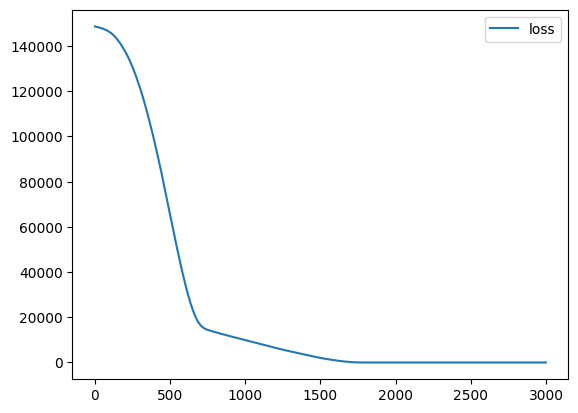

In [53]:
loss_df = pd.DataFrame(ai_brain.history.history)

loss_df.plot()

In [56]:
ai_brain.evaluate(X_test,y_test)

X_n1 = [[101]]

X_n1_1 = Scaler.transform(X_n1)

ai_brain.predict(X_n1_1)

1/1 [==============================] - 0s 24ms/step


array([[707.0377]], dtype=float32)